<a href="https://colab.research.google.com/github/LilySu/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/Lily_Su_Assignment6_LS_DS3_122_Join_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Join datasets

Objectives
- concatenate data with pandas
- merge data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Combine Data Sets: Standard Joins
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join

## Download data

We’ll work with a dataset of [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-03-27 03:31:22--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.139.197
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.139.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  43.3MB/s    in 4.6s    

2019-03-27 03:31:27 (42.7 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


## Goal: Reproduce this example

The first two orders for user id 1:

In [4]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example)


linux command to list file names

## Load data

Here's a list of all six CSV filenames

In [5]:
!ls -lh

total 681M
-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


For each CSV
- Load it with pandas
- Look at the dataframe's shape
- Look at its head (first rows)
- `display(example)`
- Which columns does it have in common with the example we want to reproduce?

### aisles

In [0]:
import pandas as pd
aisles = pd.read_csv('aisles.csv')

In [7]:
aisles.shape

(134, 2)

In [8]:
aisles.head() #documentation, dictionaries

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [9]:
display(example)

### departments

In [10]:
departments = pd.read_csv('departments.csv')
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [11]:
departments.shape

(21, 2)

### order_products__prior

In [12]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


departments doesn't have any columns we need

In [13]:
departments.sort_values(by='department', ascending=True, na_position='first')

,department_id,department
4,5,alcohol
17,18,babies
2,3,bakery
6,7,beverages
13,14,breakfast
9,10,bulk
14,15,canned goods
15,16,dairy eggs
19,20,deli
8,9,dry goods pasta


In [0]:
order_products__prior = pd.read_csv('order_products__prior.csv')

### order_products__train

In [0]:
order_products__train = pd.read_csv('order_products__train.csv')

In [16]:
order_products__train.shape

(1384617, 4)

In [17]:
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


order_products__train and order_products__prior have the exact same columns

In [18]:
order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [19]:
order_products__prior.shape


(32434489, 4)

### orders

In [0]:
orders = pd.read_csv('orders.csv')

In [21]:
orders.shape

(3421083, 7)

In [22]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


**orders** has
-user_id
-order_id
-order_number
-order_dow
-order_hour_of_day

In [23]:
display(example)

In [24]:
order_products__prior.groupby('order_id')['product_id'].count()#group by all rows, count up the number of product id's I have, count number of rows in each order
#outputs for each order, how many products

order_id
2           9
3           8
4          13
5          26
6           3
7           2
8           1
9          15
10         15
11          5
12         15
13         13
14         11
15          5
16          3
18         28
19          3
20          8
21          5
22         14
23         14
24          3
25         14
26          8
27         27
28         16
29          5
30          3
31         10
32          9
           ..
3421048     8
3421050    13
3421051    31
3421052     2
3421053     9
3421055    19
3421057     5
3421059     6
3421060    17
3421061    22
3421062     7
3421064     3
3421065     5
3421066     6
3421067     1
3421068    14
3421069    12
3421071     5
3421072    12
3421073     2
3421074     4
3421075     8
3421076     8
3421077     4
3421078     9
3421079     1
3421080     9
3421081     7
3421082     7
3421083    10
Name: product_id, Length: 3214874, dtype: int64

In [25]:
order_products__prior.sort_values(['add_to_cart_order'], ascending=False , na_position='first')

,order_id,product_id,add_to_cart_order,reordered
14825330,1564244,23737,145,0
14825329,1564244,43182,144,0
14825328,1564244,21230,143,0
14825327,1564244,22594,142,0
14825326,1564244,46346,141,0
14825325,1564244,19019,140,0
14825324,1564244,21616,139,0
14825323,1564244,26940,138,0
7492555,790903,33572,137,1
14825322,1564244,18090,137,0


In [26]:
order_products__prior.shape

(32434489, 4)

In [27]:
order_products__prior.groupby('order_id')['product_id'].count().mean()

10.088883421247614

order_products__prior.groupby('order_id')['product_id'].count().mean()

---



### products

**order_products__prior** has
-order_id
-product_id
-add_to_cart_order

In [0]:
products = pd.read_csv('products.csv')

## Concatenate order_products__prior and order_products__train

In [29]:
products.shape

(49688, 4)

In [30]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [31]:
display(example)

In [0]:
order_products = pd.concat([order_products__prior, order_products__train])

In [33]:
order_products.shape,order_products__prior.shape, order_products__train.shape

((33819106, 4), (32434489, 4), (1384617, 4))

**products** has:
-product_id
-product_name

In [34]:
len(order_products) == len(order_products__prior) + len(order_products__train)

True

In [0]:
#in py file, if not in notebook
assert len(order_products) == len(order_products__prior) + len(order_products__train)
#allows you to put test cases in code

In [36]:
assert 2+2 ==5

AssertionError: ignored

In [37]:
#now we checked rows, but what about columns
len(order_products.columns) == len(order_products__prior.columns) ==(len(order_products__train.columns))

True

In [0]:
assert (len(order_products.columns) == 
        len(order_products__prior.columns) ==
        len(order_products__train.columns))

In [39]:
order_products.shape[1]

4

In [40]:
#tuple unpacking
rows, columns = order_products.shape
print('Rows:', rows)
print('Columns:', columns)

Rows: 33819106
Columns: 4


In [0]:
a_rows, a_columns = order_products__prior.shape
b_rows, b_columns = order_products__train.shape
c_rows, c_columns = order_products.shape

assert a_columns == b_columns == c_columns
assert a_rows + b_rows == c_rows

## Get a subset of orders — the first two orders for user id 1

In [42]:
display(example)

In [43]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


I want a certain order id, find a specific order id. 

In [44]:
condition = order_products['order_id']==2539329
order_products[condition]

,order_id,product_id,add_to_cart_order,reordered
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0
24076668,2539329,26405,5,0


##Get a subset of orders =- the first two orders for user id 1

From 'orders' dataframe:
* user_id
* order_id
* order_number
* order_dow (day of week)
* order_hour_of_day





In [45]:
orders[orders['user_id']==1]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [46]:
orders[orders['user_id']==1][:2]
#slice notation ie [:2]
#assuming order # is ordered, 1 row per order number

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [0]:
#if this wasnt true,
subset = orders[(orders['user_id']==1) & (orders['order_number']<=2)]
# what does first 2 orders mean, what are the possible range of values, 

In [48]:
orders['order_number'].describe()

count    3.421083e+06
mean     1.715486e+01
std      1.773316e+01
min      1.000000e+00
25%      5.000000e+00
50%      1.100000e+01
75%      2.300000e+01
max      1.000000e+02
Name: order_number, dtype: float64

In [0]:
condition = (orders['user_id']==1) & (orders['order_number']<=2)#always refer to column names inside brackets.
#when you specify multiple conditions in pandas, surround in parrenteses then surround in ampersands or other, order of operations thing. 
columns = ['user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day']
subset = orders[condition][columns] #or orders.loc[condition,columns]
#columns that I want in the specific order that I want


## Merge dataframes

Merge the subset from orders with columns from order_products

In [50]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [51]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [106]:
order_products.shape

(33819106, 4)

In [105]:
order_products.describe()

,order_id,product_id,add_to_cart_order,reordered
count,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07
mean,1.710566e+06,2.557551e+04,8.367738e+00,5.900617e-01
std,9.874008e+05,1.409770e+04,7.139540e+00,4.918220e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.554130e+05,1.351900e+04,3.000000e+00,0.000000e+00
50%,1.710660e+06,2.525600e+04,6.000000e+00,1.000000e+00
75%,2.565587e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00


Merge with columns from products

In [52]:
order_products[['order_id', 'add_to_cart_order', 'product_id']].head()

,order_id,add_to_cart_order,product_id
0,2,1,33120
1,2,2,28985
2,2,3,9327
3,2,4,45918
4,2,5,30035


i want to merge this with thte previous subset from before

In [0]:
merged = pd.merge(subset,
        order_products[['order_id', 'add_to_cart_order', 'product_id']])

In [54]:
subset.shape, order_products.shape, merged.shape

((2, 5), (33819106, 4), (11, 7))

In [55]:
subset

,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7


In [0]:
#or above can be run as
columns = ['order_id', 'add_to_cart_order', 'product_id']
merged = pd.merge(subset, order_products[columns])

In [0]:
columns = ['order_id', 'add_to_cart_order', 'product_id']
merged = pd.merge(subset, order_products[columns],
                 how='inner', on='order_id')

In [58]:
merged

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id
0,1,2539329,1,2,8,1,196
1,1,2539329,1,2,8,2,14084
2,1,2539329,1,2,8,3,12427
3,1,2539329,1,2,8,4,26088
4,1,2539329,1,2,8,5,26405
5,1,2398795,2,3,7,1,196
6,1,2398795,2,3,7,2,10258
7,1,2398795,2,3,7,3,12427
8,1,2398795,2,3,7,4,13176
9,1,2398795,2,3,7,5,26088


In [59]:
order_products[columns].head(1)

,order_id,add_to_cart_order,product_id
0,2,1,33120


In [60]:
final_dataframe = pd.merge(merged, products[['product_id', 'product_name']])
final_dataframe
#we need to match up product id

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
1,1,2398795,2,3,7,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
8,1,2398795,2,3,7,2,10258,Pistachios
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas


In [61]:
final_dataframe.shape

(11, 8)

In [104]:
final_dataframe.describe()

,user id,order id,order number,order dow,order hour of day,add to cart order,product id
count,11.0,1.100000e+01,11.000000,11.000000,11.000000,11.000000,11.000000
mean,1.0,2.462674e+06,1.545455,2.545455,7.454545,3.272727,14034.272727
std,0.0,7.339149e+04,0.522233,0.522233,0.522233,1.678744,9207.527910
min,1.0,2.398795e+06,1.000000,2.000000,7.000000,1.000000,196.000000
25%,1.0,2.398795e+06,1.000000,2.000000,7.000000,2.000000,11342.500000
50%,1.0,2.398795e+06,2.000000,3.000000,7.000000,3.000000,13032.000000
75%,1.0,2.539329e+06,2.000000,3.000000,8.000000,4.500000,20086.000000
max,1.0,2.539329e+06,2.000000,3.000000,8.000000,6.000000,26405.000000


In [62]:
merged.shape, products[['product_id', 'product_name']].shape, final_dataframe.shape

((11, 7), (49688, 2), (11, 8))

In [63]:
final_dataframe.sort_values(by=['order_number', 'add_to_cart_order'])#secondary sort is 'add_to_cart'

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
1,1,2398795,2,3,7,1,196,Soda
8,1,2398795,2,3,7,2,10258,Pistachios
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn


reference:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

In [64]:
#change headers from user_id to user id
final_dataframe = final_dataframe.rename(columns={'user_id': 'user id'})
#or iterate data in dataframe
[column for column in final_dataframe.columns]

['user id',
 'order_id',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'add_to_cart_order',
 'product_id',
 'product_name']

In [0]:
final_dataframe.columns = [column.replace('_',' ') for column in final_dataframe]

In [66]:
final_dataframe

,user id,order id,order number,order dow,order hour of day,add to cart order,product id,product name
0,1,2539329,1,2,8,1,196,Soda
1,1,2398795,2,3,7,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
8,1,2398795,2,3,7,2,10258,Pistachios
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas


In [67]:
final_dataframe.info() #date is string, you convert to datetime, string to date may be computationally expensive.other than date (can be non-ordered or ordinal categorical)scikitlearn - everything is a number, no nan's , remove or impute, convert any nonnumerical to numerical = categorical encoding, considerations for memory usage - 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 10
Data columns (total 8 columns):
user id              11 non-null int64
order id             11 non-null int64
order number         11 non-null int64
order dow            11 non-null int64
order hour of day    11 non-null int64
add to cart order    11 non-null int64
product id           11 non-null int64
product name         11 non-null object
dtypes: int64(7), object(1)
memory usage: 792.0+ bytes


In [0]:
#in a company usually using relational databases is more common. depends on job situation. 

In [68]:
display(example)

In [0]:
#loc better to refer columns by name

# Assignment

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

## Stretch challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.

In [0]:
# Based on https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b,  the quantity is implied in orders. You have the quantity of a product by how many times it's added to a specific order.

In [0]:
orders = pd.read_csv('orders.csv')

In [72]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [74]:
orders.shape

(3421083, 7)

In [0]:
order_products__prior.head(5)

In [0]:
order_products__train.head(5)

In [77]:
products.head(5)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [128]:
most_ordered_product_1 = products['product_name']=='Banana'
orderedmost1 = products[most_ordered_product_1]
orderedmost1

,product_id,product_name,aisle_id,department_id
24851,24852,Banana,24,4


In [129]:
most_ordered_product_2 = products['product_name']=='Bag of Organic Bananas'
orderedmost2 = products[most_ordered_product_2]
orderedmost2

,product_id,product_name,aisle_id,department_id
13175,13176,Bag of Organic Bananas,24,4


In [130]:
most_ordered_product_3 = products['product_name']=='Organic Strawberries'
orderedmost3 = products[most_ordered_product_3]
orderedmost3

,product_id,product_name,aisle_id,department_id
21136,21137,Organic Strawberries,24,4


In [131]:
most_ordered_product_4 = products['product_name']=='Organic Baby Spinach'
orderedmost4 = products[most_ordered_product_4]
orderedmost4

,product_id,product_name,aisle_id,department_id
21902,21903,Organic Baby Spinach,123,4


In [132]:
most_ordered_product_5 = products['product_name']=='Organic Hass Avocado'
orderedmost5 = products[most_ordered_product_5]
orderedmost5

,product_id,product_name,aisle_id,department_id
47208,47209,Organic Hass Avocado,24,4


In [133]:
most_ordered_product_6 = products['product_name']=='Organic Hass Avocado'
orderedmost6 = products[most_ordered_product_6]
orderedmost6

,product_id,product_name,aisle_id,department_id
47208,47209,Organic Hass Avocado,24,4


In [134]:
most_ordered_product_7 = products['product_name']=='Large Lemon'
orderedmost7 = products[most_ordered_product_7]
orderedmost7

,product_id,product_name,aisle_id,department_id
47625,47626,Large Lemon,24,4


In [135]:
most_ordered_product_8 = products['product_name']=='Strawberries'
orderedmost8 = products[most_ordered_product_8]
orderedmost8

,product_id,product_name,aisle_id,department_id
16796,16797,Strawberries,24,4


In [136]:
most_ordered_product_9 = products['product_name']=='Limes'
orderedmost9 = products[most_ordered_product_9]
orderedmost9

,product_id,product_name,aisle_id,department_id
26208,26209,Limes,24,4


In [137]:
most_ordered_product_10 = products['product_name']=='Organic Whole Milk'
orderedmost10 = products[most_ordered_product_10]
orderedmost10

,product_id,product_name,aisle_id,department_id
27844,27845,Organic Whole Milk,84,16


In [142]:
top10mostordered = pd.concat([
    orderedmost1, 
    orderedmost2, 
    orderedmost3,
    orderedmost4,
    orderedmost5,
    orderedmost6,
    orderedmost7,
    orderedmost8,
    orderedmost9,
    orderedmost10,
    ])
# most_popular_products_top_10 = pd.concat([most_ordered_product_1, most_ordered_product_2])
# most_popular_products_top_10.shape
top10mostordered

,product_id,product_name,aisle_id,department_id
24851,24852,Banana,24,4
13175,13176,Bag of Organic Bananas,24,4
21136,21137,Organic Strawberries,24,4
21902,21903,Organic Baby Spinach,123,4
47208,47209,Organic Hass Avocado,24,4
47208,47209,Organic Hass Avocado,24,4
47625,47626,Large Lemon,24,4
16796,16797,Strawberries,24,4
26208,26209,Limes,24,4
27844,27845,Organic Whole Milk,84,16


In [145]:
order_products.shape

(33819106, 4)

How many times were each ordered?
First, write down which columns you need
* product_name
* add_to_cart_order


and which dataframes have them.
* order_products > add_to_cart_order
* top10mostordered > product_name, product_id

Next, merge these into a single dataframe.
* match by product_id

In [0]:
how_many = pd.merge(order_products, top10mostordered[['product_id','product_name']])

In [151]:
how_many.shape

(2454967, 5)

In [152]:
how_many.head()

,order_id,product_id,add_to_cart_order,reordered,product_name
0,3,21903,4,1,Organic Baby Spinach
1,26,21903,6,0,Organic Baby Spinach
2,31,21903,3,1,Organic Baby Spinach
3,39,21903,4,0,Organic Baby Spinach
4,56,21903,8,1,Organic Baby Spinach


# How many times were each ordered?

In [158]:
how_many['product_name'].value_counts().head(10)

Banana                    491291
Organic Hass Avocado      441754
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

to do for stretch goal:
* retrieve "order" dataframe
* combine "order" with "how_many" by matching "order_id"
* graph "order_hour_of_day"

In [161]:
orders_with_hour_of_day = pd.merge(how_many, orders[['order_id','order_hour_of_day']])
orders_with_hour_of_day.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,order_hour_of_day
0,3,21903,4,1,Organic Baby Spinach,17
1,26,21903,6,0,Organic Baby Spinach,16
2,26,24852,2,1,Banana,16
3,31,21903,3,1,Organic Baby Spinach,15
4,39,21903,4,0,Organic Baby Spinach,18


In [162]:
orders_with_hour_of_day.shape

(2454967, 6)

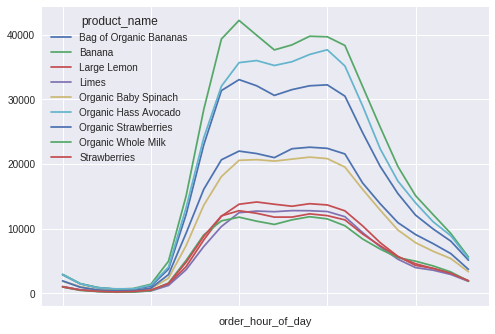

In [187]:
hour_bin = pd.cut(orders_with_hour_of_day['order_hour_of_day'],bins=24)


pd.crosstab(hour_bin,orders_with_hour_of_day['product_name']).plot.line()


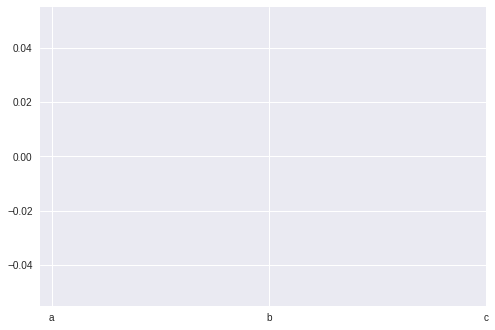

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
s = pd.Series(orders_with_hour_of_day['product_name'], index=['a', 'b', 'c'])
s.plot.line()
plt.xticks(np.arange(len(s.index)), s.index)
plt.show()